<a href="https://colab.research.google.com/github/yohannaftali/polygon/blob/main/Calculate_Area_Polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas geopandas shapely

In [50]:
# Prepare Dataset
import pandas as pd
from io import StringIO

# If read from csv, use this
# df = pd.read_csv('coordinates.csv')

# Paste after '''
coordinates = '''
0 0 0
0 5 0
2.5 7 0
5 7 0
8 9 0
9 3 0
12 1 0
6 0.5 0
4 3 0
2 1 0
0 0 0
'''

# Convert the string into a DataFrame with space separator, if use tab use sep='\t',
df = pd.read_csv(StringIO(coordinates), delim_whitespace=True, header=None, names=['x', 'y', 'z'])

# Save dataframe to coordinates.csv (optional)
df.to_csv('coordinates.csv', index=False)
df

,x,y,z
0,0.0,0.0,0
1,0.0,5.0,0
2,2.5,7.0,0
3,5.0,7.0,0
4,8.0,9.0,0
5,9.0,3.0,0
6,12.0,1.0,0
7,6.0,0.5,0
8,4.0,3.0,0
9,2.0,1.0,0


In [51]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

df['geometry'] = df.apply(lambda row: Point(row['x'], row['y']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf

,x,y,z,geometry
0,0.0,0.0,0,POINT (0.00000 0.00000)
1,0.0,5.0,0,POINT (0.00000 5.00000)
2,2.5,7.0,0,POINT (2.50000 7.00000)
3,5.0,7.0,0,POINT (5.00000 7.00000)
4,8.0,9.0,0,POINT (8.00000 9.00000)
5,9.0,3.0,0,POINT (9.00000 3.00000)
6,12.0,1.0,0,POINT (12.00000 1.00000)
7,6.0,0.5,0,POINT (6.00000 0.50000)
8,4.0,3.0,0,POINT (4.00000 3.00000)
9,2.0,1.0,0,POINT (2.00000 1.00000)


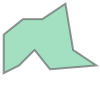

In [52]:
polygon = Polygon([(point.x, point.y) for point in gdf['geometry'].values])
polygon

In [53]:
# Calculate area

area = polygon.area
area

55.5

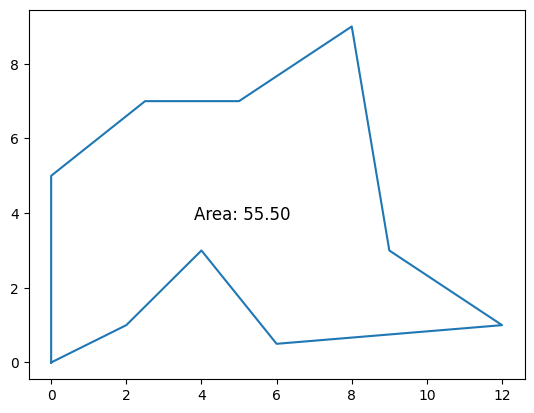

In [54]:
import matplotlib.pyplot as plt

plt.plot(*polygon.exterior.xy)
plt.text(polygon.centroid.x, polygon.centroid.y, f'Area: {area:.2f}', ha='center', va='center', fontsize=12)
plt.show()